【台北大學碩士班課程】統計應用數學與計算<br>
【授課老師】汪群超<br>
【學期】1112 <br>
【主要內容】主成分分析（PCA）在實際資料上的實作<br>
【作者】711133117 陳怡升 <br>
【參考網站】[汪群超 Shallow Machine Learning Lesson5 : 主成分分析的原理與實驗](https://ntpuccw.blog/python-in-learning/sml-lesson-5-%e4%b8%bb%e6%88%90%e5%88%86%e5%88%86%e6%9e%90%e7%9a%84%e5%8e%9f%e7%90%86%e8%88%87%e5%af%a6%e9%a9%97/)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import sklearn
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
file = r'D:\711133117\1112ShallowMachineLearning\hw1PCA'

# 習題1：紅酒資料
有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：

讀取資料

In [3]:
df = pd.read_excel(file + r'\wine.xlsx')
print(df.shape)
df.head(5)

(178, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


<a id="data1Q1"></a>
## 繪製變數間的相關係數圖

<hr>

從下圖可明顯發現，變數之間有相關性，Total_Phenois與Flavanoids有強烈的正相關

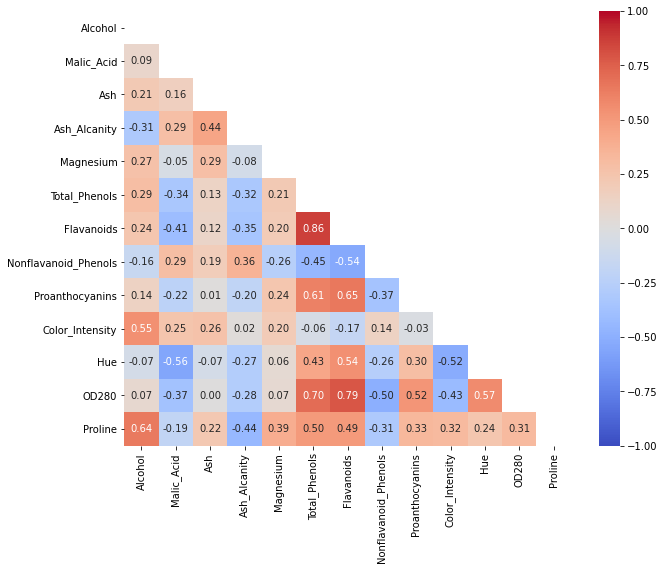

In [4]:
corr =  df.iloc[:,:13].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:,:13].corr(), cmap='coolwarm', annot=True, fmt=".2f", mask=mask, vmax=1, vmin=-1)
plt.show()

## 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot）
題目：觀察每個變數的 scaling，作為是否標準化的參考<br>

<hr>

從下方左圖可以觀察出未標準化前各變數的全距差距大，並且Proline的數值比其他變數大許多，接著從下方右圖可以觀察到標準化過後的變數平均數都在0附近，並不會因為變異特別大而對PCA造成特別強烈影響。


In [5]:
def standard(X):
    return (X-X.mean())/X.std()

In [6]:
X = standard(df.iloc[:,:13])

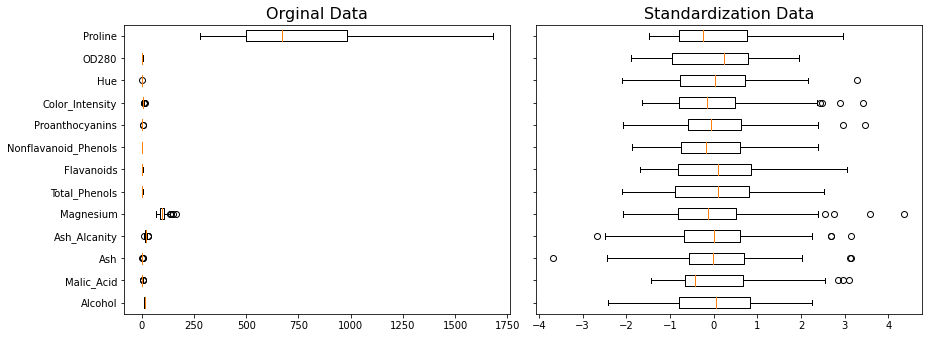

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8), sharey='row')
axes[0].boxplot(df.iloc[:,:13], vert=False)
axes[1].boxplot(X, vert=False)
axes[0].set_title('Orginal Data', fontsize=16)
axes[1].set_title('Standardization Data', fontsize=16)
plt.yticks(range(1,14), list(df.iloc[:,:13].columns))
plt.tight_layout()
plt.show()

<a id="data1Q3"></a>
## 繪製特徵值由大而小的分布與 scree plot。
題目：進行主成分分析，繪製特徵值由大而小的分布與 scree plot。<br>

<hr>

<font size=2>標準化的影響</font>

使用原始資料進行PCA，觀察到以下2點：
1. 從下方圖形可以發現，第1項成分就可以解釋 0.998 的原始變數，是不是受到數值大小的影響？
2. 進一步觀察第1項成分的特徵向量，參考 [第7題](#data1Q7) 的第2個圖形，可以發現第1項成分基本上是由 Proline 所構成，也就是標準化前數值較大且變異較大的變數

由於Proline與其他變數的數值差異較大，會使PCA的主成分受到Proline的影響較大而忽略掉其他變數，因此在進行PCA之前要記得將變數標準化，讓各變數的尺度都一樣
<hr>

<font size=2>標準化後的特徵值</font>

觀察標準化後之資料進行PCA的特徵值，可以發現取到第1至7項成分就有接近9成的解釋能力，在此推薦可以取用7個成分。

In [8]:
pca_nostand = PCA().fit(df.iloc[:,:13])

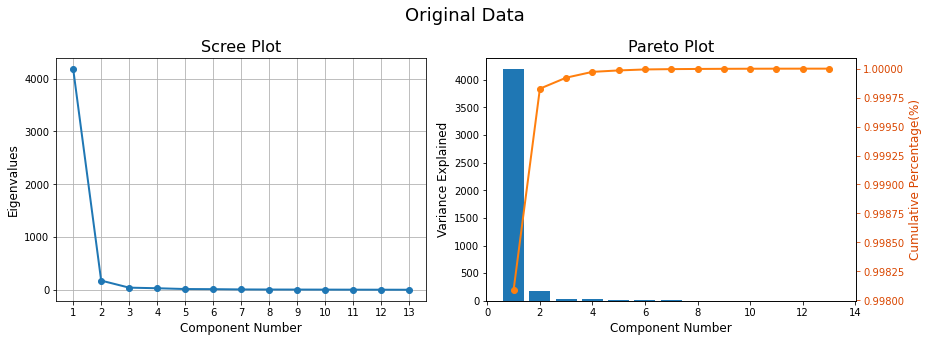

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))
x = np.arange(1,1+len(pca_nostand.singular_values_))
axes[0].plot(x, pca_nostand.singular_values_, marker='o', lw=2)
axes[0].set_xticks(x)
axes[0].set_xlabel('Component Number', fontsize=12)
axes[0].set_ylabel('Eigenvalues', fontsize=12)
axes[0].grid(True)
axes[0].set_title('Scree Plot', fontsize=16)

axes[1].bar(x, pca_nostand.singular_values_)
ax2 = axes[1].twinx()
ax2.plot(x, pca_nostand.explained_variance_ratio_.cumsum(), marker='o', color='C1', lw=2)
ax2.tick_params(axis='y', colors='#D94600')
ax2.set_ylabel('Cumulative Percentage(%)', fontsize=12, color="#D94600")
axes[1].set_xlabel('Component Number', fontsize=12)
axes[1].set_ylabel('Variance Explained', fontsize=12)
axes[1].set_title('Pareto Plot', fontsize=16)

fig.suptitle('Original Data', fontsize=18)
plt.tight_layout()
plt.show()

In [10]:
Sx = np.cov(X.T, bias=False)
w, v = np.linalg.eig(Sx)
idx = np.argsort(w)[::-1]
eigvalues = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvalues) @ eigvecs.T

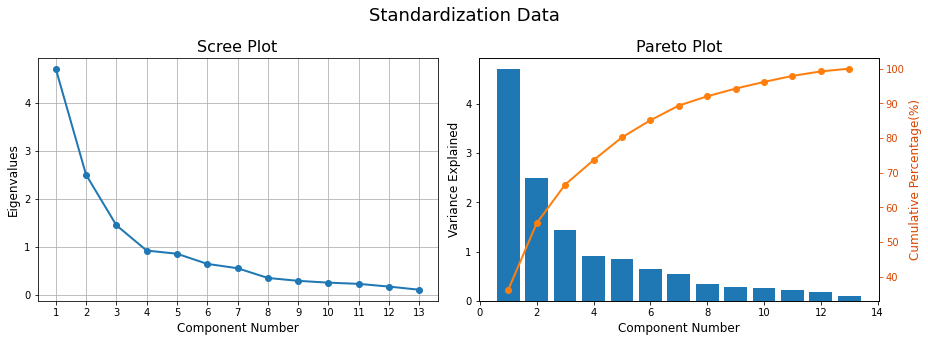

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))
x = np.arange(1,1+len(eigvalues))
axes[0].plot(x, eigvalues, marker='o', lw=2)
axes[0].set_xticks(x)
axes[0].set_xlabel('Component Number', fontsize=12)
axes[0].set_ylabel('Eigenvalues', fontsize=12)
axes[0].grid(True)
axes[0].set_title('Scree Plot', fontsize=16)

axes[1].bar(x, eigvalues)
ax2 = axes[1].twinx()
ax2.plot(x, eigvalues.cumsum()/eigvalues.sum()*100, marker='o', color='C1', lw=2)
ax2.tick_params(axis='y', colors='#D94600')
ax2.set_ylabel('Cumulative Percentage(%)', fontsize=12, color="#D94600")
axes[1].set_xlabel('Component Number', fontsize=12)
axes[1].set_ylabel('Variance Explained', fontsize=12)
axes[1].set_title('Pareto Plot', fontsize=16)

fig.suptitle('Standardization Data', fontsize=18)
plt.tight_layout()
plt.show()

## 利用PCA取得前兩項成分，繪製其散布圖
資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。

<hr>

下圖為前兩項成分的散步圖，右方是使用有經過標準化的資料，可以觀察出整體大概分成2~3群左右，左方是使用沒有標準化的資料，並沒有辦法直接看出有幾個群組。

In [12]:
pca = PCA().fit(X)
Z = pca.transform(X)
Z_nostand = pca_nostand.transform(df.iloc[:,:13])

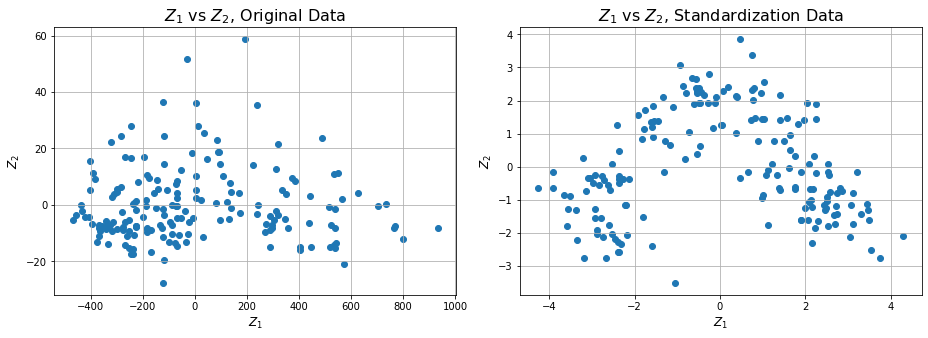

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))

for e, ax in enumerate(axes):
    if e==0:
        drawdf = Z_nostand.copy()
    else:
        drawdf = Z.copy()
    ax.scatter(drawdf[:,0], drawdf[:,1], color='C0')
    ax.set_xlabel(r'$Z_1$', fontsize=12)
    ax.set_ylabel(r'$Z_2$', fontsize=12)
    ax.grid(True)
axes[0].set_title(r'$Z_1$ vs $Z_2$, Original Data', fontsize=16)
axes[1].set_title(r'$Z_1$ vs $Z_2$, Standardization Data', fontsize=16)
    
plt.tight_layout()
plt.show()

## 根據每筆資料的標籤，塗上顏色
再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。

<hr>

根據每筆資料的標籤，塗上顏色後可以明顯發現，有標準化過只靠第1和2項成分就可以觀察出群組的趨勢，而原始資料則非常的混雜。

In [14]:
markerlst = ['^', 's', 'o']

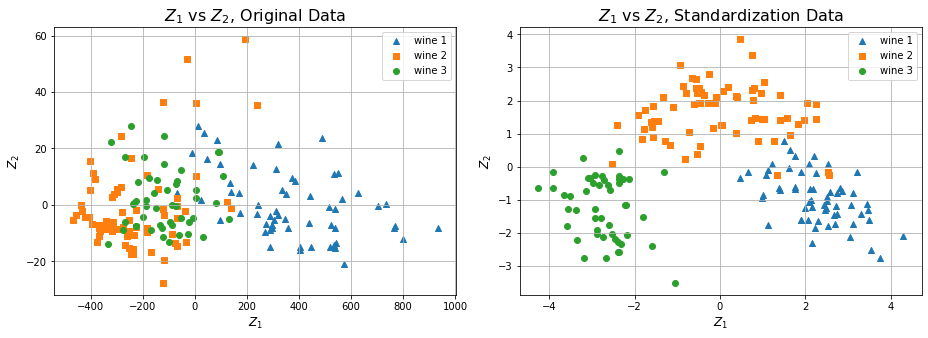

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))
for e, ax in enumerate(axes):
    if e==0:
        drawdf = Z_nostand.copy()
    else:
        drawdf = Z.copy()
    for e2, group in enumerate(set(df['Customer_Segment'])):
        filt = df['Customer_Segment']==group
        ax.scatter(drawdf[filt,0], drawdf[filt,1], label=f'wine {group}', marker=markerlst[e2])
    ax.set_xlabel(r'$Z_1$', fontsize=12)
    ax.set_ylabel(r'$Z_2$', fontsize=12)
    ax.grid(True)
    ax.legend()
axes[0].set_title(r'$Z_1$ vs $Z_2$, Original Data', fontsize=16)
axes[1].set_title(r'$Z_1$ vs $Z_2$, Standardization Data', fontsize=16)

plt.tight_layout()
plt.show()

## 採三個主成分，繪製立體圖
如果採三個主成分，則可繪製立體圖。觀察是否比2維的圖形具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

<hr>

就算採三個主成分，原始資料還是很混雜，並沒有哪個角度能特別看出組別的趨勢，而標準化過的資料則是能更清楚的觀察到組別的界線。

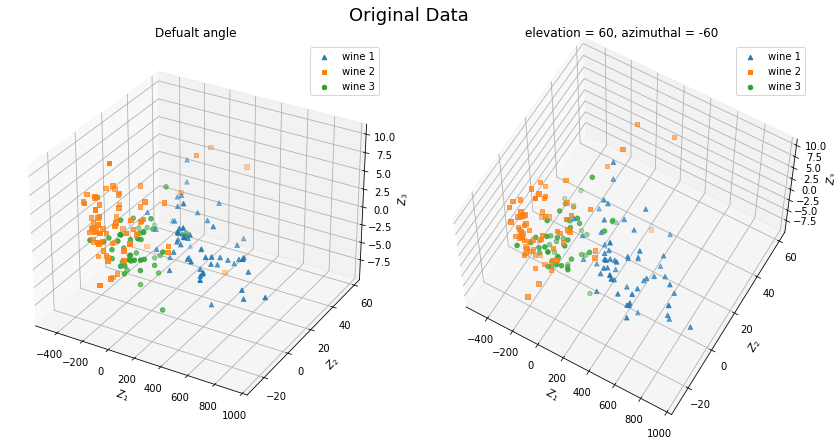

In [16]:
fig = plt.figure(figsize=(12,6))
#----------plot1----------#
ax = fig.add_subplot(1, 2, 1, projection='3d')
drawdata = Z_nostand.copy()
for e, group in enumerate(set(df['Customer_Segment'])):
    filt = df['Customer_Segment']==group
    ax.scatter(drawdata[filt,0], drawdata[filt,1], drawdata[filt,2], label=f'wine {group}', marker=markerlst[e])
ax.legend()
ax.set_title('Defualt angle')
ax.set_xlabel(r'$Z_1$');ax.set_ylabel(r'$Z_2$');ax.set_zlabel(r'$Z_3$')
#----------plot2----------#
ax = fig.add_subplot(1, 2, 2, projection='3d')
for e, group in enumerate(set(df['Customer_Segment'])):
    filt = df['Customer_Segment']==group
    ax.scatter(drawdata[filt,0], drawdata[filt,1], drawdata[filt,2], label=f'wine {group}', marker=markerlst[e])
ax.legend()
elev = 60; azim = -60
ax.set_title(f'elevation = {elev}, azimuthal = {azim}')
ax.set_xlabel(r'$Z_1$');ax.set_ylabel(r'$Z_2$');ax.set_zlabel(r'$Z_3$')
ax.view_init(elev, azim)
fig.suptitle('Original Data', fontsize=18)
plt.tight_layout()
plt.show()

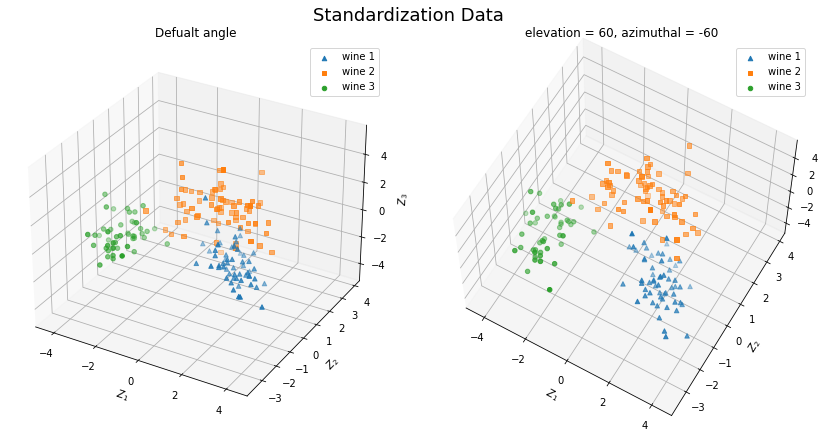

In [17]:
fig = plt.figure(figsize=(12,6))
#----------plot1----------#
ax = fig.add_subplot(1, 2, 1, projection='3d')
drawdata = Z.copy()
for e, group in enumerate(set(df['Customer_Segment'])):
    filt = df['Customer_Segment']==group
    ax.scatter(drawdata[filt,0], drawdata[filt,1], drawdata[filt,2], label=f'wine {group}', marker=markerlst[e])
ax.legend()
ax.set_title('Defualt angle')
ax.set_xlabel(r'$Z_1$');ax.set_ylabel(r'$Z_2$');ax.set_zlabel(r'$Z_3$')
#----------plot2----------#
ax = fig.add_subplot(1, 2, 2, projection='3d')
for e, group in enumerate(set(df['Customer_Segment'])):
    filt = df['Customer_Segment']==group
    ax.scatter(drawdata[filt,0], drawdata[filt,1], drawdata[filt,2], label=f'wine {group}', marker=markerlst[e])
ax.legend()
elev = 60; azim = -60
ax.set_title(f'elevation = {elev}, azimuthal = {azim}')
ax.set_xlabel(r'$Z_1$');ax.set_ylabel(r'$Z_2$');ax.set_zlabel(r'$Z_3$')
ax.view_init(elev, azim)
fig.suptitle('Standardization Data', fontsize=18)
plt.tight_layout()
plt.show()

<a id="data1Q7"></a>
## 觀察 $Z_1$ 與 $Z_2$，發現哪個原變數比較重要？
題目：$Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，如下式，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。
\begin{equation}
Z_1 = \mathbf{v}_1(1)X_1 + \mathbf{v}_1(2)X_2 + \cdots + \mathbf{v}_1(p)X_p
\end{equation}

<hr>
下表為所有主成分的特徵向量，最後兩列分別為該成分的特徵值以及解釋原變數的比例，以下列舉出前 7 項成分中，重要的原變數，根據係數絕對值的大小排序：

- 第1項成分：Flavanoids、Total_Phenols、OD280、Proanthocyanins
- 第2項成分：Color_Intensity、Alcohol
- 第3項成分：Ash、Ash_Alcanity
- 第4項成分：Malic_Acid、Hue、Proanthocyanins、Magnesium
- 第5項成分：Magnesium、Nonflavanoid_Phenols
- 第6項成分：Malic_Acid、Proanthocyanins、Color_Intensity
- 第7項成分：Nonflavanoid_Phenols、Malic_Acid

接著觀察第一小題的[相關係數矩陣](#data1Q1)，可以發現第一項成分重要的變數之間的相關係數也比較高，第二項成分重要的變數之間的相關係數也比較高，從此例了解到越有相關性的變數越有可能轉換成同一個主成分

In [18]:
cmap_o = cm.get_cmap('Purples', 128)
newcolors = np.vstack((cmap_o(np.linspace(0.9, 0, 128)), cmap_o(np.linspace(0, 0.9, 128))))
newcmp = ListedColormap(newcolors, name='Purples_twoside')

In [19]:
comps = pca.components_.T.round(4)
cols = [f'PC {i}' for i in range(1, comps.shape[1]+1)]
indx = list(X.columns)
np_all = np.vstack((comps, pca.explained_variance_.reshape([1,-1]), pca.explained_variance_ratio_.reshape([1,-1])))
df_comps = pd.DataFrame(np_all, columns=cols, index= indx + ['Eigenvalues', 'Percentage of variance explained'])
styler = df_comps.style.format("{:.3f}")
for col in cols:
    vmax = abs(df_comps.loc[indx, col]).max()
    styler.background_gradient(subset=(indx, col), cmap=newcmp, axis=1, vmax=vmax, vmin=-vmax)
styler

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13
Alcohol,0.144,-0.484,-0.207,-0.018,-0.266,-0.213,-0.056,-0.396,0.509,0.212,-0.226,-0.266,0.015
Malic_Acid,-0.245,-0.225,0.089,0.537,0.035,-0.537,0.420,-0.066,-0.075,-0.309,0.076,0.122,0.026
Ash,-0.002,-0.316,0.626,-0.214,-0.143,-0.154,-0.149,0.170,-0.308,-0.027,-0.499,-0.050,-0.141
Ash_Alcanity,-0.239,0.011,0.612,0.061,0.066,0.101,-0.287,-0.428,0.200,0.053,0.479,-0.056,0.092
Magnesium,0.142,-0.300,0.131,-0.352,0.727,-0.038,0.323,0.156,0.271,0.068,0.071,0.062,0.057
Total_Phenols,0.395,-0.065,0.146,0.198,-0.149,0.084,-0.028,0.406,0.286,-0.320,0.304,-0.304,-0.464
Flavanoids,0.423,0.003,0.151,0.152,-0.109,0.019,-0.061,0.187,0.050,-0.163,-0.026,-0.043,0.832
Nonflavanoid_Phenols,-0.298,-0.029,0.170,-0.203,-0.501,0.259,0.595,0.233,0.196,0.215,0.117,0.042,0.114
Proanthocyanins,0.313,-0.039,0.149,0.399,0.137,0.534,0.372,-0.368,-0.209,0.134,-0.237,-0.096,-0.117
Color_Intensity,-0.089,-0.530,-0.137,0.066,-0.076,0.419,-0.228,0.034,0.056,-0.291,0.032,0.604,-0.012


In [20]:
comps = pca_nostand.components_.T.round(4)
cols = [f'PC {i}' for i in range(1, comps.shape[1]+1)]
indx = list(X.columns)
np_all = np.vstack((comps, pca_nostand.explained_variance_.reshape([1,-1]), pca_nostand.explained_variance_ratio_.reshape([1,-1])))
df_comps = pd.DataFrame(np_all, columns=cols, index= indx + ['Eigenvalues', 'Percentage of variance explained'])
styler = df_comps.style.format("{:.3f}")
for col in cols:
    vmax = abs(df_comps.loc[indx, col]).max()
    styler.background_gradient(subset=(indx, col), cmap=newcmp, axis=1, vmax=vmax, vmin=-vmax)
styler

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13
Alcohol,0.002,0.001,-0.017,-0.141,0.020,0.194,-0.923,-0.285,-0.087,-0.002,-0.015,-0.016,0.008
Malic_Acid,-0.001,0.002,-0.122,-0.160,-0.613,0.743,0.150,0.065,-0.016,-0.018,-0.023,0.067,-0.011
Ash,0.000,0.005,-0.052,0.010,0.020,0.042,-0.045,0.149,-0.074,-0.087,0.954,-0.132,-0.174
Ash_Alcanity,-0.005,0.026,-0.939,0.331,0.064,-0.024,-0.032,-0.015,-0.002,0.004,-0.053,0.005,0.002
Magnesium,0.018,0.999,0.030,0.005,-0.006,-0.002,-0.002,0.004,0.002,-0.000,-0.003,0.001,0.002
Total_Phenols,0.001,0.001,0.041,0.075,0.315,0.279,0.020,0.177,-0.256,0.847,0.009,0.004,-0.027
Flavanoids,0.002,-0.000,0.085,0.169,0.525,0.434,0.039,0.248,-0.378,-0.520,-0.133,-0.037,0.070
Nonflavanoid_Phenols,-0.000,-0.001,-0.013,-0.011,-0.030,-0.022,0.005,-0.006,-0.037,0.038,0.199,0.148,0.967
Proanthocyanins,0.001,0.005,0.025,0.050,0.251,0.242,0.310,-0.870,0.051,0.010,0.136,-0.013,-0.018
Color_Intensity,0.002,0.015,-0.291,-0.879,0.332,0.003,0.113,0.081,0.099,-0.023,-0.010,0.050,-0.005


# 習題2：乳癌資料

In [21]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
df = pd.DataFrame(breast['data'], columns=breast['feature_names'])
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<a id="data2Q7"></a>
## 繪製變數間的相關係數圖

<hr>

從下圖可明顯發現，變數之間有相關性，mean radius、mean perimeter、mean area、worst radius、worst perimeter、worst area有強烈的正相關。

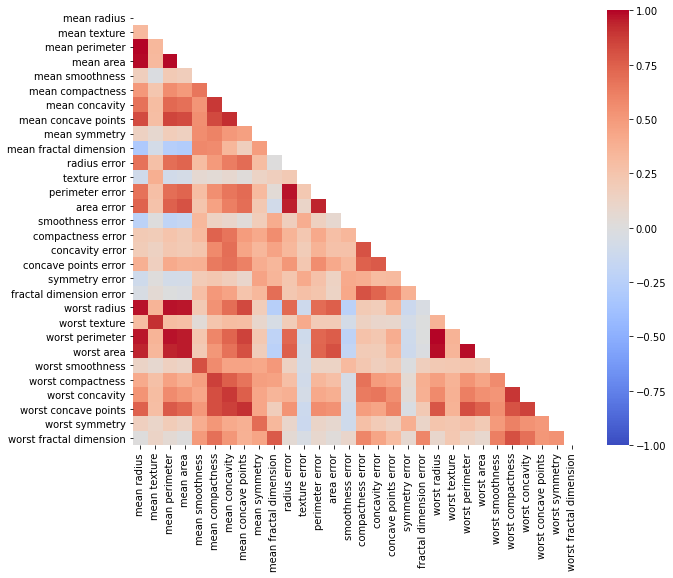

In [22]:
corr =  df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', fmt=".2f", mask=mask, vmax=1, vmin=-1)
plt.show()

## 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot）
題目：觀察每個變數的 scaling，作為是否標準化的參考

<hr>

從下方左圖可以觀察出未標準化前各變數的全距差距大，並且area的數值比其他變數大許多，離群值也較多，接著從下方右圖可以觀察到標準化過後的變數平均數都在0附近，並不會因為變異特別大而對PCA造成特別強烈影響。

In [23]:
X = standard(df)

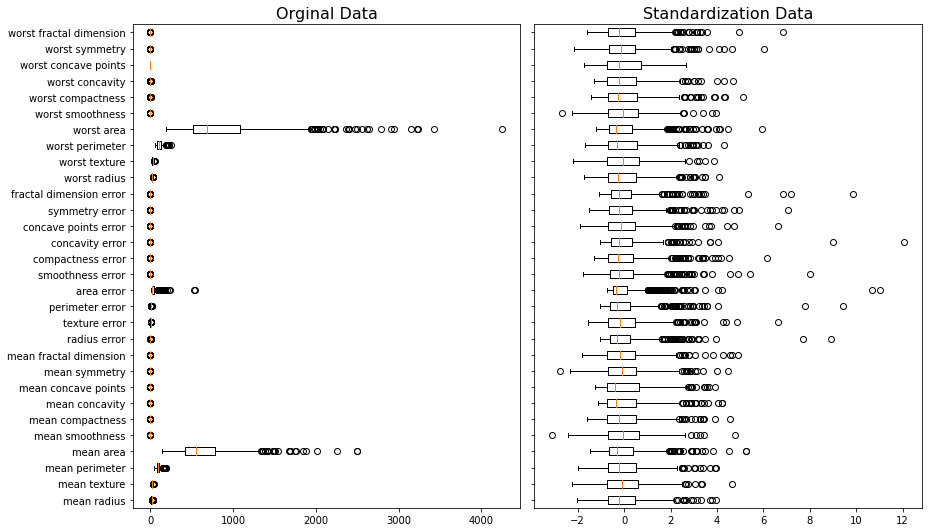

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(13,7.5), sharey='row')
axes[0].boxplot(df, vert=False)
axes[1].boxplot(X, vert=False)
axes[0].set_title('Orginal Data', fontsize=16)
axes[1].set_title('Standardization Data', fontsize=16)
plt.yticks(range(1,df.shape[1]+1), list(df.columns))
plt.tight_layout()
plt.show()

## 繪製特徵值由大而小的分布與 scree plot。
題目：進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

<hr>

<font size=2>標準化的影響</font>

使用原始資料進行PCA，觀察到以下2點：
1. 從下方圖形可以發現，第1項成分就可以解釋 0.982 的原始變數，是不是受到數值大小的影響？
2. 進一步觀察第1項成分的特徵向量，參考 [第7題](#data2Q7) 的第2個圖形，可以發現第1項成分基本上是由 worst area 與 mean area 所構成，也就是標準化前數值較大且變異較大的變數

由於Proline與其他變數的數值差異較大，會使PCA的主成分受到Proline的影響較大而忽略掉其他變數，因此在進行PCA之前要記得將變數標準化，讓各變數的尺度都一樣
<hr>

<font size=2>標準化後的特徵值</font>

觀察標準化後之資料進行PCA的特徵值，從左方的Scree Plot可以看出在第7項主成分的特徵值有明顯下降的趨勢，且第1到6項成分就有接近9成的解釋能力，在此推薦可以選擇前6個主成分。

In [25]:
pca_nostand = PCA(n_components=10).fit(df)

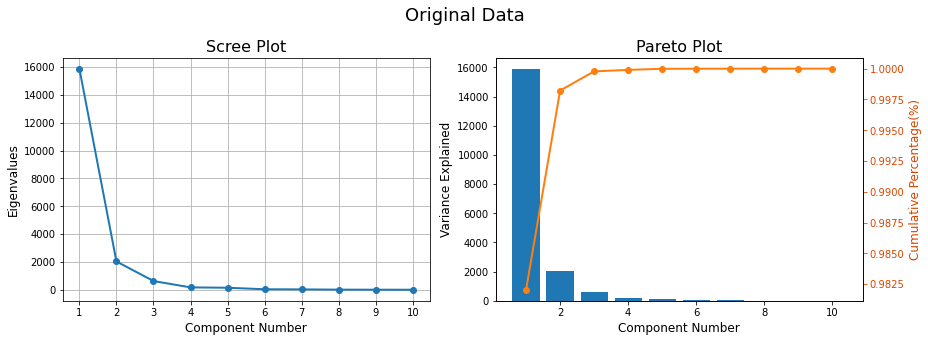

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))
x = np.arange(1,1+len(pca_nostand.singular_values_))
axes[0].plot(x, pca_nostand.singular_values_, marker='o', lw=2)
axes[0].set_xticks(x)
axes[0].set_xlabel('Component Number', fontsize=12)
axes[0].set_ylabel('Eigenvalues', fontsize=12)
axes[0].grid(True)
axes[0].set_title('Scree Plot', fontsize=16)

axes[1].bar(x, pca_nostand.singular_values_)
ax2 = axes[1].twinx()
ax2.plot(x, pca_nostand.explained_variance_ratio_.cumsum(), marker='o', color='C1', lw=2)
ax2.tick_params(axis='y', colors='#D94600')
ax2.set_ylabel('Cumulative Percentage(%)', fontsize=12, color="#D94600")
axes[1].set_xlabel('Component Number', fontsize=12)
axes[1].set_ylabel('Variance Explained', fontsize=12)
axes[1].set_title('Pareto Plot', fontsize=16)

fig.suptitle('Original Data', fontsize=18)
plt.tight_layout()
plt.show()

In [27]:
pca = PCA(n_components=15).fit(X)

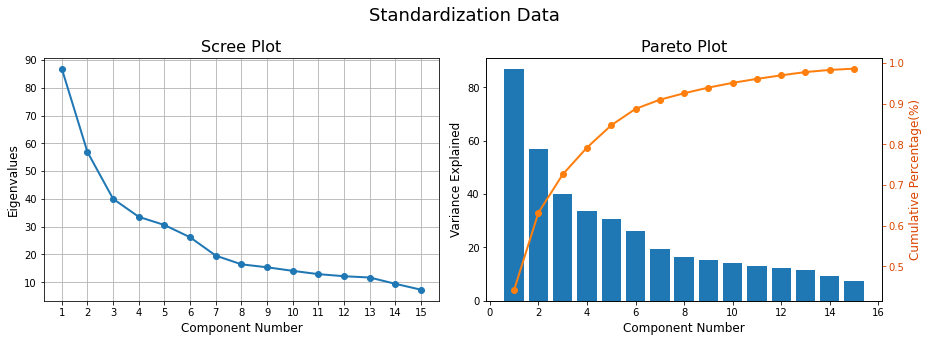

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))
x = np.arange(1,1+len(pca.singular_values_))
axes[0].plot(x, pca.singular_values_, marker='o', lw=2)
axes[0].set_xticks(x)
axes[0].set_xlabel('Component Number', fontsize=12)
axes[0].set_ylabel('Eigenvalues', fontsize=12)
axes[0].grid(True)
axes[0].set_title('Scree Plot', fontsize=16)

axes[1].bar(x, pca.singular_values_)
ax2 = axes[1].twinx()
ax2.plot(x, pca.explained_variance_ratio_.cumsum(), marker='o', color='C1', lw=2)
ax2.tick_params(axis='y', colors='#D94600')
ax2.set_ylabel('Cumulative Percentage(%)', fontsize=12, color="#D94600")
axes[1].set_xlabel('Component Number', fontsize=12)
axes[1].set_ylabel('Variance Explained', fontsize=12)
axes[1].set_title('Pareto Plot', fontsize=16)

fig.suptitle('Standardization Data', fontsize=18)
plt.tight_layout()
plt.show()

## 利用PCA取得前兩項成分，繪製其散布圖
資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。

<hr>

下圖為前兩項成分的散步圖，右方是使用有經過標準化的資料，可以觀察到兩群之間的變異數差距，左方是使用沒有標準化的資料。

In [29]:
Z = pca.transform(X)
Z_nostand = pca_nostand.transform(df)

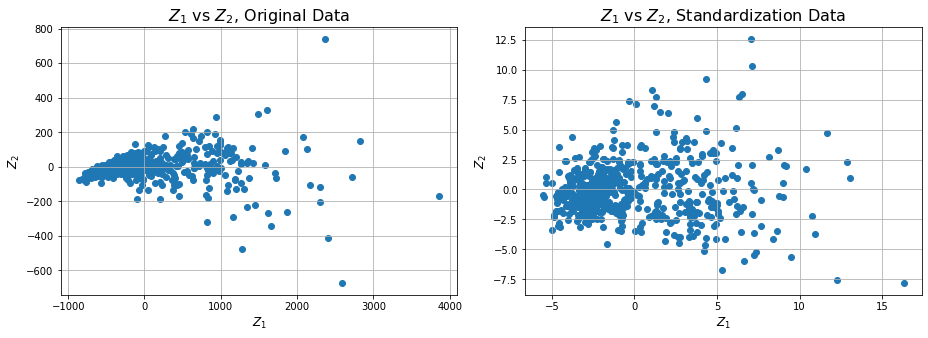

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))

for e, ax in enumerate(axes):
    if e==0:
        drawdf = Z_nostand.copy()
    else:
        drawdf = Z.copy()
    ax.scatter(drawdf[:,0], drawdf[:,1], color='C0')
    ax.set_xlabel(r'$Z_1$', fontsize=12)
    ax.set_ylabel(r'$Z_2$', fontsize=12)
    ax.grid(True)
axes[0].set_title(r'$Z_1$ vs $Z_2$, Original Data', fontsize=16)
axes[1].set_title(r'$Z_1$ vs $Z_2$, Standardization Data', fontsize=16)
    
plt.tight_layout()
plt.show()

## 根據每筆資料的標籤，塗上顏色
再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。

<hr>

根據每筆資料的標籤，塗上顏色後可以明顯發現，有標準化過可以觀察出粗略群組的趨勢，而原始資料則有許多重疊的部分，後續則不再討論使用原始資料的3D繪圖。

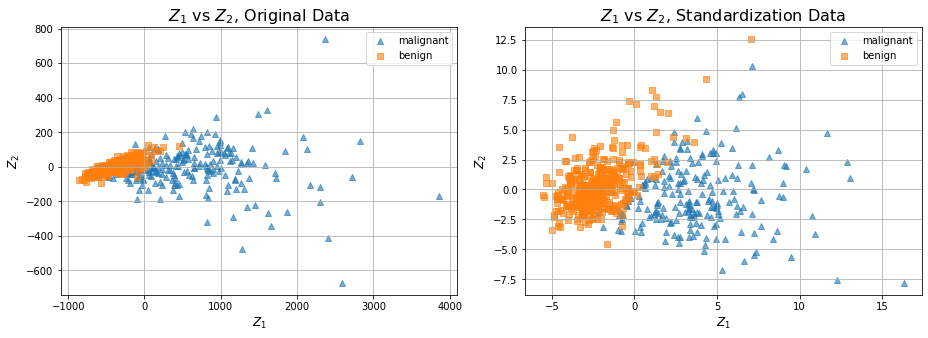

In [31]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))
for e, ax in enumerate(axes):
    if e==0:
        drawdf = Z_nostand.copy()
    else:
        drawdf = Z.copy()
    for e2, group in enumerate(set(breast.get('target'))):
        filt = breast.get('target')==group
        ax.scatter(drawdf[filt,0], drawdf[filt,1], label='{}'.format(breast.get('target_names')[group]), marker=markerlst[e2], alpha=0.6)
    ax.set_xlabel(r'$Z_1$', fontsize=12); ax.set_ylabel(r'$Z_2$', fontsize=12)
    ax.grid(True);ax.legend()
axes[0].set_title(r'$Z_1$ vs $Z_2$, Original Data', fontsize=16)
axes[1].set_title(r'$Z_1$ vs $Z_2$, Standardization Data', fontsize=16)

plt.tight_layout()
plt.show()

## 採三個主成分，繪製立體圖
如果採三個主成分，則可繪製立體圖。觀察是否比2維的圖形具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

<hr>

加入第三項主成分進行繪圖，可以些微看出兩組別之間的切分面。

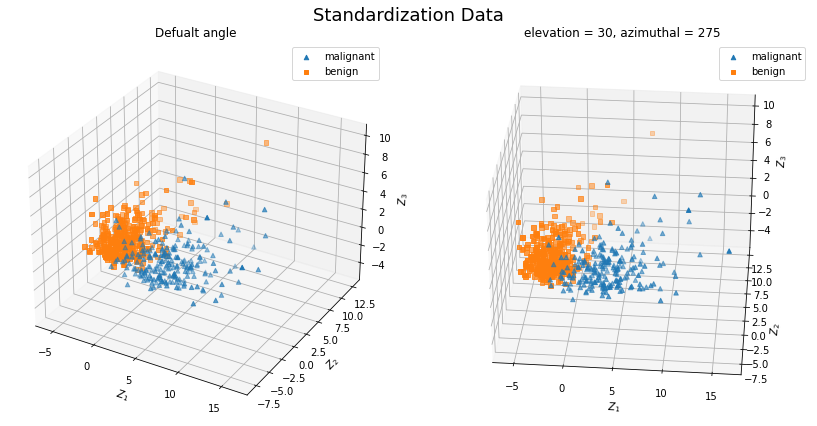

In [32]:
fig = plt.figure(figsize=(12,6))
#----------plot1----------#
ax = fig.add_subplot(1, 2, 1, projection='3d')
drawdf = Z.copy()
for e2, group in enumerate(set(breast.get('target'))):
    filt = breast.get('target')==group
    ax.scatter(drawdf[filt,0], drawdf[filt,1], drawdf[filt,2], 
               label='{}'.format(breast.get('target_names')[group]), marker=markerlst[e2])
ax.legend();ax.set_title('Defualt angle')
ax.set_xlabel(r'$Z_1$');ax.set_ylabel(r'$Z_2$');ax.set_zlabel(r'$Z_3$')
#----------plot2----------#
ax = fig.add_subplot(1, 2, 2, projection='3d')
for e2, group in enumerate(set(breast.get('target'))):
    filt = breast.get('target')==group
    ax.scatter(drawdf[filt,0], drawdf[filt,1], drawdf[filt,2], 
               label='{}'.format(breast.get('target_names')[group]), marker=markerlst[e2])
ax.legend()
elev = 30; azim = 275
ax.set_title(f'elevation = {elev}, azimuthal = {azim}')
ax.set_xlabel(r'$Z_1$');ax.set_ylabel(r'$Z_2$');ax.set_zlabel(r'$Z_3$')
ax.view_init(elev, azim)
fig.suptitle('Standardization Data', fontsize=18)
plt.tight_layout()
plt.show()

<a id="data1Q7"></a>
## 觀察 $Z_1$ 與 $Z_2$，發現哪個原變數比較重要？
題目：$Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，如下式，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。
\begin{equation}
Z_1 = \mathbf{v}_1(1)X_1 + \mathbf{v}_1(2)X_2 + \cdots + \mathbf{v}_1(p)X_p
\end{equation}

<hr>
下表為所有主成分的特徵向量，最後兩列分別為該成分的特徵值以及解釋原變數的比例，以下列舉出前 7 項成分中，重要的原變數，根據係數絕對值的大小排序：

- 第1項成分：mean concave points、mean concavity、worst concave points、mean compactness、worst perimeter、worst concavity、worst radius、mean perimeter、worst area、mean area、mean radius、perimeter error、worst compactness
- 第2項成分：mean fractal dimension、fractal dimension error、worst fractal dimension
- 第3項成分：texture error、smoothness error、symmetry error、worst symmetry、radius error、perimeter error、worst smoothness
- 第4項成分：worst texture、mean texture、texture error
- 第5項成分：mean smoothness、concavity error、worst smoothness
- 第6項成分：worst symmetry、symmetry error、worst smoothness、mean symmetry、smoothness error、mean smoothness

統整一下6項主成分與原變數之間的關聯：

- 第1項成分：有 concave points、concavity、area、radius 的 mean和worst
- 第2項成分：都是與 fractal dimension 有關的變數
- 第3項成分：和 error 有關的變數
- 第4項成分：3個與 texture 有關的變數
- 第5項成分：與 smoothness 有關的變數
- 第6項成分：與 smoothness、symmetry 有關的變數

接著觀察第一小題的[相關係數矩陣](#data2Q1)，可以發現第一項成分重要的變數之間的相關係數也比較高，第二項成分重要的變數之間的相關係數也比較高，從此例了解到越有相關性的變數越有可能轉換成同一個主成分

In [33]:
comps = pca.components_.T.round(4)
cols = [f'PC {i}' for i in range(1, comps.shape[1]+1)]
indx = list(X.columns)
np_all = np.vstack((comps, pca.explained_variance_.reshape([1,-1]), pca.explained_variance_ratio_.reshape([1,-1])))
df_comps = pd.DataFrame(np_all, columns=cols, index= indx + ['Eigenvalues', 'Percentage of variance explained'])
styler = df_comps.style.format("{:.3f}")
for col in cols:
    vmax = abs(df_comps.loc[indx, col]).max()
    styler.background_gradient(subset=(indx, col), cmap=newcmp, axis=1, vmax=vmax, vmin=-vmax)
styler

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
mean radius,0.219,-0.234,-0.009,0.041,0.038,0.019,-0.124,-0.007,-0.223,0.096,0.042,0.051,0.012,0.059,0.051
mean texture,0.104,-0.060,0.065,-0.603,-0.050,-0.032,0.011,0.131,0.113,0.241,-0.302,0.255,0.203,-0.022,0.108
mean perimeter,0.228,-0.215,-0.009,0.042,0.037,0.017,-0.115,-0.019,-0.224,0.086,0.017,0.039,0.044,0.049,0.040
mean area,0.221,-0.231,0.029,0.053,0.010,-0.002,-0.052,0.035,-0.196,0.075,0.110,0.065,0.067,0.011,-0.014
mean smoothness,0.143,0.186,-0.104,0.159,-0.365,-0.286,-0.141,-0.289,0.006,-0.069,-0.137,0.317,0.046,0.445,0.118
mean compactness,0.239,0.152,-0.074,0.032,0.012,-0.014,0.031,-0.151,-0.168,0.013,-0.308,-0.104,0.229,0.008,-0.231
mean concavity,0.258,0.060,0.003,0.019,0.086,-0.009,-0.107,-0.073,0.041,-0.136,0.124,0.066,0.387,-0.189,0.128
mean concave points,0.261,-0.035,-0.026,0.065,-0.044,-0.052,-0.150,-0.152,-0.112,0.008,-0.072,0.043,0.132,-0.245,0.217
mean symmetry,0.138,0.190,-0.040,0.067,-0.306,0.356,-0.094,-0.232,0.256,0.572,0.163,-0.289,0.190,0.031,0.074
mean fractal dimension,0.064,0.367,-0.023,0.049,-0.044,-0.119,0.296,-0.177,-0.124,0.081,-0.038,0.236,0.106,-0.377,-0.518


In [34]:
comps = pca_nostand.components_.T.round(4)
cols = [f'PC {i}' for i in range(1, comps.shape[1]+1)]
indx = list(X.columns)
np_all = np.vstack((comps, pca_nostand.explained_variance_.reshape([1,-1]), pca_nostand.explained_variance_ratio_.reshape([1,-1])))
df_comps = pd.DataFrame(np_all, columns=cols, index= indx + ['Eigenvalues', 'Percentage of variance explained'])
styler = df_comps.style.format("{:.3f}")
for col in cols:
    vmax = abs(df_comps.loc[indx, col]).max()
    styler.background_gradient(subset=(indx, col), cmap=newcmp, axis=1, vmax=vmax, vmin=-vmax)
styler

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
mean radius,0.005,0.009,-0.012,-0.034,0.035,-0.131,0.034,-0.075,-0.350,0.140
mean texture,0.002,-0.003,-0.006,-0.362,-0.443,-0.213,-0.784,-0.069,0.004,0.077
mean perimeter,0.035,0.063,-0.072,-0.329,0.313,-0.840,0.189,0.084,0.133,-0.089
mean area,0.517,0.852,-0.028,0.039,-0.046,0.052,-0.007,-0.003,-0.004,0.002
mean smoothness,0.000,-0.000,0.000,-0.000,0.001,-0.000,0.002,0.003,0.008,-0.004
mean compactness,0.000,-0.000,0.000,-0.003,0.003,-0.001,0.000,0.016,0.056,-0.030
mean concavity,0.000,0.000,0.000,-0.003,0.002,0.000,0.001,0.019,0.070,-0.028
mean concave points,0.000,0.000,0.000,-0.001,0.001,-0.001,0.001,0.009,0.019,-0.010
mean symmetry,0.000,-0.000,0.000,-0.001,0.001,-0.000,0.001,0.009,0.015,-0.008
mean fractal dimension,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.003,0.008,-0.004
